Toy Examples with Code

https://ai.damtp.cam.ac.uk/pysr/api/

In [1]:
import numpy as np
from pysr import *

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


`Simple search`

拟合公式 $$ 2 \cos (x_3) + x_0^2 - 2  $$

In [2]:
X = 2 * np.random.randn(100, 5)
y = 2 * np.cos(X[:, 3]) + X[:, 0] ** 2 - 2
model = PySRRegressor(binary_operators=["+", "-", "*", "/"])
model.fit(X, y)
print(model)

c:\Users\taizun\miniconda3\envs\syh\lib\site-packages\pysr\sr.py:2582: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Compiling Julia backend...


[ Info: Started!


PySRRegressor.equations_ = [
	   pick     score                                           equation  \
	0        0.000000                                            x0 * x0   
	1        0.480453                             -1.8618065 + (x0 * x0)   
	2        0.001592             -1.8601245 + ((x0 - 0.039912477) * x0)   
	3        0.036267      -1.8618065 + (x0 * (x0 + (-0.10506168 * x3)))   
	4        0.269381  (x0 * x0) - (x3 * (-0.34305695 * (0.12588452 -...   
	5  >>>>  0.226663  ((x0 * x0) + -0.85416466) - (x3 * ((0.1668744 ...   
	6        0.007926  ((x0 * x0) + -0.85416466) - (x3 * (((0.1668744...   
	7        0.023294  (-0.8539921 + (x0 * x0)) - (x3 * ((((x3 * 0.02...   
	8        0.016230  (-0.8539921 + (x0 * x0)) - (x3 * ((((x3 * 0.02...   
	
	       loss  complexity  
	0  5.613928           3  
	1  2.147588           5  
	2  2.140760           7  
	3  1.990981           9  
	4  1.161678          11  
	5  0.738260          13  
	6  0.726649          15  
	7  0.693572          1

`Custom operator`

In [3]:
X = 2 * np.random.randn(100, 5)
y = 1 / X[:, 0]
model = PySRRegressor(
    binary_operators=["+", "*"],
    unary_operators=["inv(x) = 1/x"],
    extra_sympy_mappings={"inv": lambda x: 1/x},
)
model.fit(X, y)
print(model)

c:\Users\taizun\miniconda3\envs\syh\lib\site-packages\pysr\sr.py:2582: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!


PySRRegressor.equations_ = [
	   pick      score   equation          loss  complexity
	0         0.000000  1.5116882  5.312147e+01           1
	1  >>>>  34.881849    inv(x0)  3.769429e-14           2
]


`Multiple outputs`

In [ ]:
X = 2 * np.random.randn(100, 5)
y = 1 / X[:, [0, 1, 2]] # 可以看到这里有多个输入
model = PySRRegressor(
    binary_operators=["+", "*"],
    unary_operators=["inv(x) = 1/x"],
    extra_sympy_mappings={"inv": lambda x: 1/x},
)
model.fit(X, y)

c:\Users\taizun\miniconda3\envs\syh\lib\site-packages\pysr\sr.py:2582: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!



Expressions evaluated per second: 3.950e+05
Head worker occupation: 13.3%
Progress: 847 / 1800 total iterations (47.056%)
Best equations for output 1
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           9.593e+03  1.594e+01  y₀ = x₃
2           1.495e-13  1.594e+01  y₀ = inv(x₀)
8           1.495e-13  4.937e-06  y₀ = ((1.2569 + x₄) * 2.9375e-09) + inv(x₀)
---------------------------------------------------------------------------------------------------
Best equations for output 2
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.238e+01  1.594e+01  y₁ = 0.33672
2           5.106e-14  1.594e+01  y₁ = inv(x₁)
---------------------------------------------------------------------------------------------------
Best equations for output 3
Hall of Fame:
------

PySRRegressor.equations_ = [
[
	   pick      score                                    equation          loss  \
	0         0.000000                                          x3  9.593046e+03   
	1  >>>>  38.700108                                     inv(x0)  1.495248e-13   
	2         0.000005  ((1.2568897 + x4) * 2.937454e-9) + inv(x0)  1.495204e-13   
	
	   complexity  
	0           1  
	1           2  
	2           8  
], [
	   pick      score   equation          loss  complexity
	0         0.000000  0.3367189  1.238417e+01           1
	1  >>>>  33.122123    inv(x1)  5.106360e-14           2
], [
	   pick     score                                           equation  \
	0        0.000000                                            inv(x2)   
	1  >>>>  0.000128  0.010384511 + (inv(x2) + (-0.16865532 * 0.0615...   
	
	           loss  complexity  
	0  1.155964e-14           2  
	1  1.155076e-14           8  
]]

`Plotting an expression`

In [5]:
model.latex()[0]

'\\frac{1}{x_{0}}'

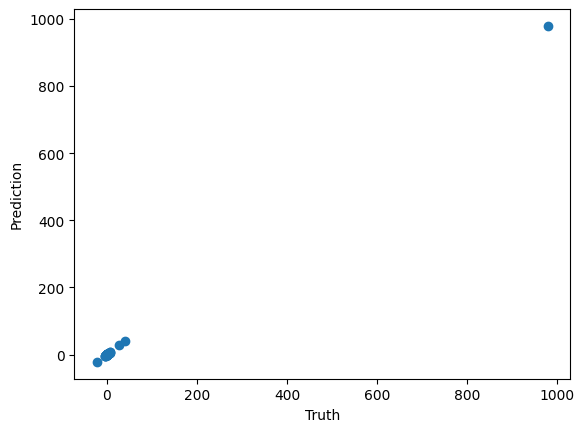

In [6]:
from matplotlib import pyplot as plt
plt.scatter(y[:, 0], model.predict(X)[:, 0])
plt.xlabel('Truth')
plt.ylabel('Prediction')
plt.show()

`Feature selection`

PySR and evolution-based symbolic regression in general performs very poorly when the number of features is large. Even, say, 10 features might be too much for a typical equation search.

If you are dealing with high-dimensional data with a particular type of structure, you might consider using deep learning to break the problem into smaller "chunks" which can then be solved by PySR, as explained in the paper https://arxiv.org/abs/2006.11287

For tabular datasets, this is a bit trickier. Luckily, PySR has a built-in feature selection mechanism. Simply declare the parameter `select_k_features=5`, for selecting the most important 5 features.

In [7]:
X = np.random.randn(300, 30)
y = X[:, 3]**2 - X[:, 19]**2 + 1.5

In [8]:
model = PySRRegressor(
    binary_operators=["+", "-", "*", "/"],
    unary_operators=["exp"],
    select_k_features=5,
)

In [9]:
model.fit(X, y)

c:\Users\taizun\miniconda3\envs\syh\lib\site-packages\pysr\sr.py:2582: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Using features ['x3' 'x7' 'x10' 'x19' 'x26']


[ Info: Started!


PySRRegressor.equations_ = [
	   pick      score                                           equation  \
	0         0.000000                                      exp(0.574352)   
	1         0.639663                                            x3 * x3   
	2         0.093628                             0.57598937 + (x3 * x3)   
	3         0.004532               ((x3 / 1.0834885) * x3) - -0.6685054   
	4  >>>>  15.843462                   ((x3 * x3) - (x19 * x19)) - -1.5   
	5         0.017426  (((x3 * x3) - (x19 * x19)) + 0.7949385) + 0.70...   
	
	           loss  complexity  
	0  3.684310e+00           2  
	1  1.943363e+00           3  
	2  1.611496e+00           5  
	3  1.596956e+00           7  
	4  2.765902e-14           9  
	5  2.671163e-14          11  
]

Before the Julia backend is launched, you can see the string:

`Using features ['x3', 'x5', 'x7', 'x19', 'x21']`

which indicates that the feature selection (powered by a gradient-boosting tree) has successfully selected the relevant two features.

This fit should find the solution quickly, whereas with the huge number of features, it would have struggled.

This simple preprocessing step is enough to simplify our tabular dataset, but again, for more structured datasets, you should try the deep learning approach mentioned above.